In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/processed-dataset-csv/processed_dataset.csv")
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,...,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Day of Week,Is Weekend,Day Name,Month,Year
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,...,84.044600,85.403629,111,Clear,No,5,1,Saturday,1,2022
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,...,91.407038,59.983689,100,Clear,No,5,1,Saturday,1,2022
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,...,61.375541,95.466020,189,Clear,No,5,1,Saturday,1,2022
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,...,75.547092,63.567452,111,Clear,No,5,1,Saturday,1,2022
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,...,64.634762,93.155171,104,Clear,No,5,1,Saturday,1,2022


In [3]:
df.rename(columns={'Road/Intersection Name': 'RoadIntersection Name'}, inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   RoadIntersection Name               8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [5]:
df.describe()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Day of Week,Is Weekend,Month,Year
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348,2.986235,0.286705,5.976611,2022.851723
std,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573,2.007967,0.452248,3.336125,0.772103
min,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000,0.000000,0.000000,1.000000,2022.000000
25%,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000,1.000000,0.000000,3.000000,2022.000000
50%,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000,3.000000,0.000000,6.000000,2023.000000
75%,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000,5.000000,1.000000,9.000000,2023.000000
max,72039.000000,89.790843,1.500000,100.000000,100.000000,10.000000,194.078000,79.979744,99.993652,99.995049,243.000000,6.000000,1.000000,12.000000,2024.000000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8936 non-null   datetime64[ns]
 1   Area Name                           8936 non-null   object        
 2   RoadIntersection Name               8936 non-null   object        
 3   Traffic Volume                      8936 non-null   int64         
 4   Average Speed                       8936 non-null   float64       
 5   Travel Time Index                   8936 non-null   float64       
 6   Congestion Level                    8936 non-null   float64       
 7   Road Capacity Utilization           8936 non-null   float64       
 8   Incident Reports                    8936 non-null   int64         
 9   Environmental Impact                8936 non-null   float64       
 10  Public Transport Usage  

# **Q: Is traffic speed normally distributed? Also checking for the high and low traffic volume days**

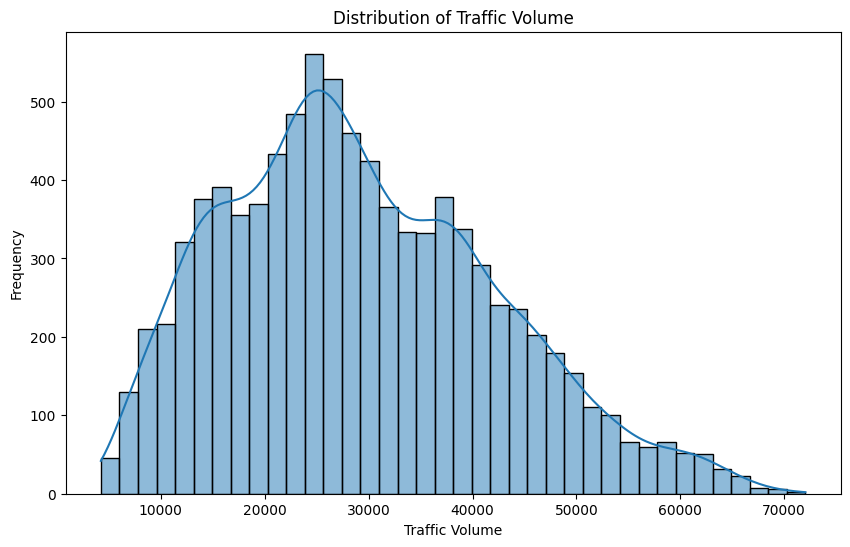

In [7]:
# histplot to view traffic volume
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Traffic Volume', kde = True)
plt.title("Distribution of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

**Analysis base on "Distribution of Traffic Volume" plot**# :

1.The graph shows one peak around 20000 and the highest peak is around 28000

2.The two peaks likely represent the morning and evening rush hours, where the traffic volume is significantly higher than the other timesTraffic management strategies should be heavily focused on these two peak periods to achieve the biggest impact


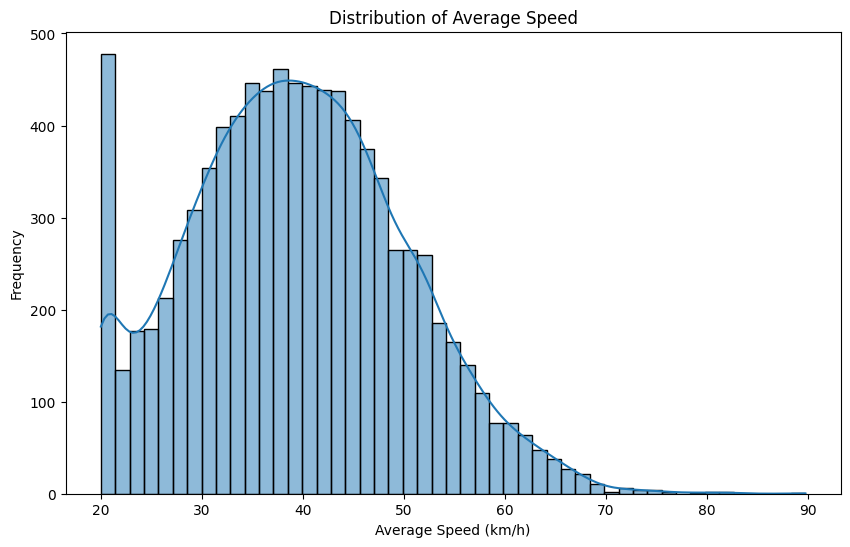

In [8]:
# histplot to check average speed
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Average Speed', kde = True)
plt.title("Distribution of Average Speed")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

**Analysis base on "Distribution of Average Speed" plot**:
1. The Graph Shows the a peak Of 34-44 Km/hr , which is where most traffic moves. Also, the curve has a long tail towards very slow speed of 20 km/h
Based on the data traffic can move at a decent pace but it is heavily congested and moving very slowly
2. The presence of a long tail of slow speed is a clear indicator of a persistent congestion problem
3. The issue isn't just about high traffic its about the frequency id severe slowdowns

# Q: **Which days have the slowest average speed and is there any noticeable drop in traffic on weekends/weekdays?**

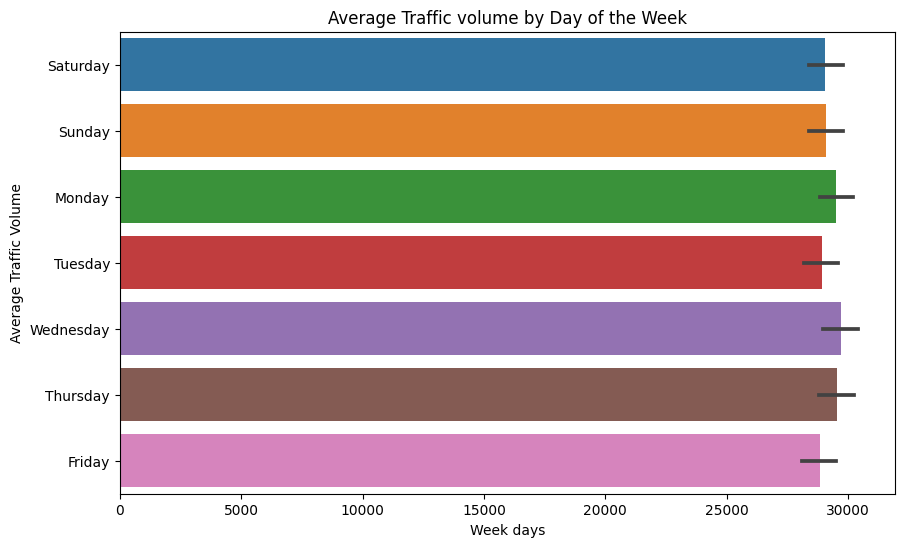

In [9]:
#Average Traffic volume by Day of the Week
plt.figure(figsize=(10,6))
sns.barplot(data = df , x = 'Traffic Volume', y = 'Day Name')
plt.title("Average Traffic volume by Day of the Week")
plt.xlabel("Week days")
plt.ylabel("Average Traffic Volume")
plt.show()

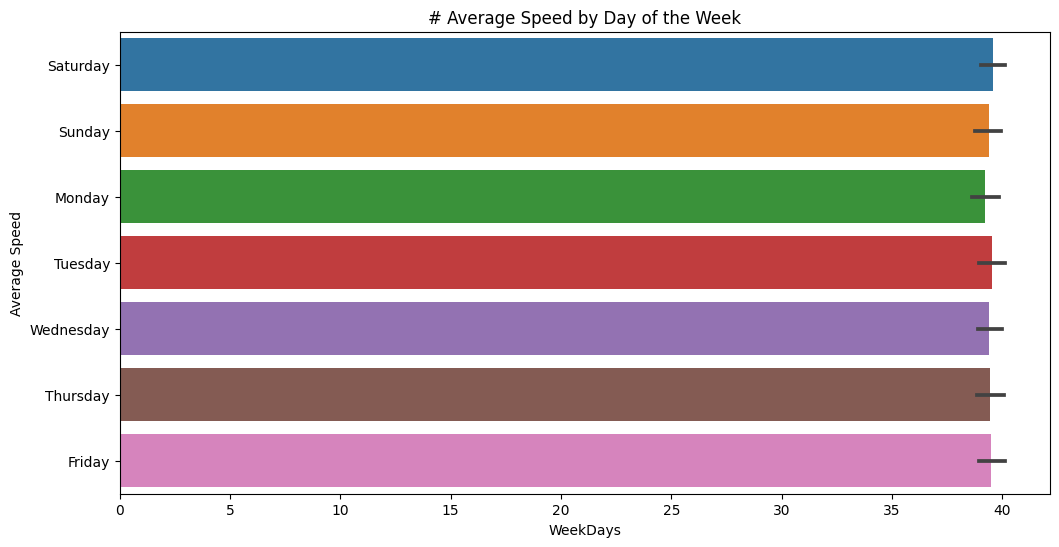

In [10]:
# Average Speed by Day of the Week
plt.figure(figsize = (12,6))
sns.barplot(data = df , x = 'Average Speed' , y = 'Day Name')
plt.title("# Average Speed by Day of the Week")
plt.xlabel("WeekDays")
plt.ylabel("Average Speed")
plt.show()

**Analysis base on "Average Traffic volume and Average Traffic Speed by Day of the Week" plot:**

* Both the graphs shows only little variation across all days of the week.
* Average traffic volume and average speed on Weekends are nearly identical to those on weekdays

# Q: **Did traffic volume increase from 2022 to 2024?**

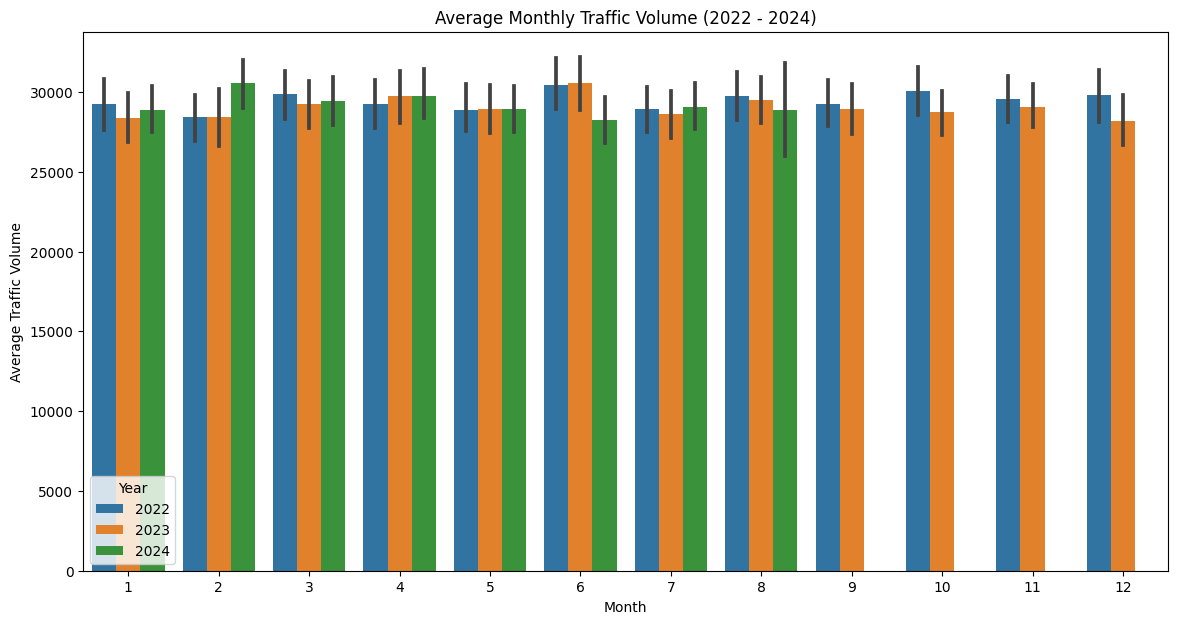

In [11]:
# Bar plot to check the average traffic on each month based on the year
plt.figure(figsize = (14, 7))
sns.barplot(data = df, y = 'Traffic Volume', x = 'Month', hue = 'Year')
plt.title("Average Monthly Traffic Volume (2022 - 2024)")
plt.xlabel("Month")
plt.ylabel("Average Traffic Volume")
plt.show()

**Analysis base on "Average Monthly Traffic Volume (2022 - 2024)" plot**:


* There are no significant seasonal or holiday related drops in traffic volume in Bengaluru traffic remains consistently high year aroundSo the city's traffic problem is a continuous issue not a seasonal one
* The consistency across the years also indicates the problem is not getting better or worse at a noticeable rate from year to year

# **Q: Identify the most congested locations in Bengaluru**

In [12]:
# location based analysis
df_traffic_location = df[["Area Name", "RoadIntersection Name", "Traffic Volume"]]
df_traffic_location.head(5)

,Area Name,RoadIntersection Name,Traffic Volume
0,Indiranagar,100 Feet Road,50590
1,Indiranagar,CMH Road,30825
2,Whitefield,Marathahalli Bridge,7399
3,Koramangala,Sony World Junction,60874
4,Koramangala,Sarjapur Road,57292


* **The Data Shows that the most traffic volume is Indira Nagar And in Koramangala.**

In [13]:
# grouping based on the Area Name and calculating the mean for Traffic Volume
avg_traffic_location = df.groupby(["Area Name", "RoadIntersection Name"])['Traffic Volume'].mean()
avg_traffic_location

# finding the top 'Areas' with high traffic volume
top_traffic_location = avg_traffic_location.sort_values(ascending = False).head(5)

print("The Top Traffic Locations:\n", top_traffic_location)

The Top Traffic Locations:
 Area Name    RoadIntersection Name
Koramangala  Sony World Junction      41470.801170
             Sarjapur Road            40189.950000
M.G. Road    Trinity Circle           35350.137466
             Anil Kumble Circle       35251.828722
Indiranagar  CMH Road                 32611.924419
Name: Traffic Volume, dtype: float64


In [14]:
# Calculating congestion level and average speed based on the location
avg_speed_congestion_lvl = df.groupby(["Area Name", "RoadIntersection Name"]).agg({
  "Traffic Volume": 'mean',
  "Average Speed": 'mean',
  "Congestion Level": 'mean'
})

avg_speed_congestion_lvl

Traffic Volume  Average Speed  \
Area Name       RoadIntersection Name                                  
Electronic City Hosur Road               16557.223827      43.991574   
                Silk Board Junction      16134.534545      43.329606   
Hebbal          Ballari Road             26272.640756      39.956644   
                Hebbal Flyover           26794.924051      40.343881   
Indiranagar     100 Feet Road            31956.852326      38.428621   
                CMH Road                 32611.924419      38.860062   
Jayanagar       Jayanagar 4th Block      24496.236207      40.148526   
                South End Circle         24704.119730      39.438724   
Koramangala     Sarjapur Road            40189.950000      36.145719   
                Sony World Junction      41470.801170      35.980025   
M.G. Road       Anil Kumble Circle       35251.828722      37.395406   
                Trinity Circle           35350.137466      37.678174   
Whitefield      ITPL Main Road           21866.037778      41.972256   
                Marathahalli Bridge      20772.953252      42.295083   
Yeshwanthpur    Tumkur Road              18574.490305      43.945861   
                Yeshwanthpur Circle      19277.115282      42.965323   

                                       Congestion Level  
Area Name       RoadIntersection Name                    
Electronic City Hosur Road                    55.203745  
                Silk Board Junction           53.699820  
Hebbal          Ballari Road                  79.514551  
                Hebbal Flyover                80.662354  
Indiranagar     100 Feet Road                 87.107415  
                CMH Road                      88.176365  
Jayanagar       Jayanagar 4th Block           76.712995  
                South End Circle              77.277398  
Koramangala     Sarjapur Road                 93.845163  
                Sony World Junction           94.125087  
M.G. Road       Anil Kumble Circle            90.782145  
                Trinity Circle                90.372556  
Whitefield      ITPL Main Road                71.101106  
                Marathahalli Bridge           67.182913  
Yeshwanthpur    Tumkur Road                   60.949415  
                Yeshwanthpur Circle           63.744162

In [15]:
top_congested_Location = avg_speed_congestion_lvl.sort_values(by = 'Congestion Level',ascending = False).head(5)
print("The most congested Locations Are:",top_congested_Location)

The most congested Locations Are:                                    Traffic Volume  Average Speed  \
Area Name   RoadIntersection Name                                  
Koramangala Sony World Junction      41470.801170      35.980025   
            Sarjapur Road            40189.950000      36.145719   
M.G. Road   Anil Kumble Circle       35251.828722      37.395406   
            Trinity Circle           35350.137466      37.678174   
Indiranagar CMH Road                 32611.924419      38.860062   

                                   Congestion Level  
Area Name   RoadIntersection Name                    
Koramangala Sony World Junction           94.125087  
            Sarjapur Road                 93.845163  
M.G. Road   Anil Kumble Circle            90.782145  
            Trinity Circle                90.372556  
Indiranagar CMH Road                      88.176365  


In [16]:
# finding the the fastest flowing location based on speed
avg_speed_location = avg_speed_congestion_lvl.sort_values(by = "Average Speed", ascending = False).head()
print("The Fastest flowing Locations:\n",avg_speed_location)

The Fastest flowing Locations:
                                        Traffic Volume  Average Speed  \
Area Name       RoadIntersection Name                                  
Electronic City Hosur Road               16557.223827      43.991574   
Yeshwanthpur    Tumkur Road              18574.490305      43.945861   
Electronic City Silk Board Junction      16134.534545      43.329606   
Yeshwanthpur    Yeshwanthpur Circle      19277.115282      42.965323   
Whitefield      Marathahalli Bridge      20772.953252      42.295083   

                                       Congestion Level  
Area Name       RoadIntersection Name                    
Electronic City Hosur Road                    55.203745  
Yeshwanthpur    Tumkur Road                   60.949415  
Electronic City Silk Board Junction           53.699820  
Yeshwanthpur    Yeshwanthpur Circle           63.744162  
Whitefield      Marathahalli Bridge           67.182913  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8936 non-null   datetime64[ns]
 1   Area Name                           8936 non-null   object        
 2   RoadIntersection Name               8936 non-null   object        
 3   Traffic Volume                      8936 non-null   int64         
 4   Average Speed                       8936 non-null   float64       
 5   Travel Time Index                   8936 non-null   float64       
 6   Congestion Level                    8936 non-null   float64       
 7   Road Capacity Utilization           8936 non-null   float64       
 8   Incident Reports                    8936 non-null   int64         
 9   Environmental Impact                8936 non-null   float64       
 10  Public Transport Usage  

## **Q: Does Weather Condition cause a significant drop in Traffic/Average Speed?**

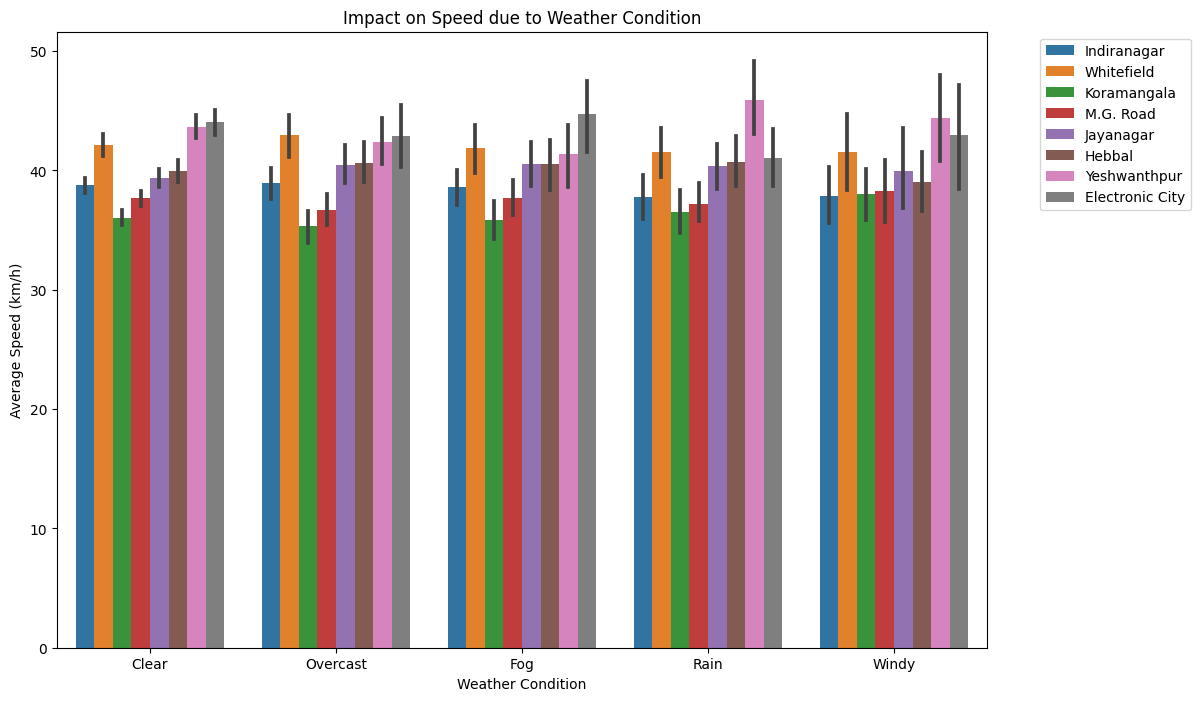

In [18]:
# checking the impact of Weather Condition on Traffic
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = 'Weather Conditions', y = 'Average Speed', hue = 'Area Name')
plt.title("Impact on Speed due to Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Speed (km/h)")
plt.legend(bbox_to_anchor = (1.05, 1))

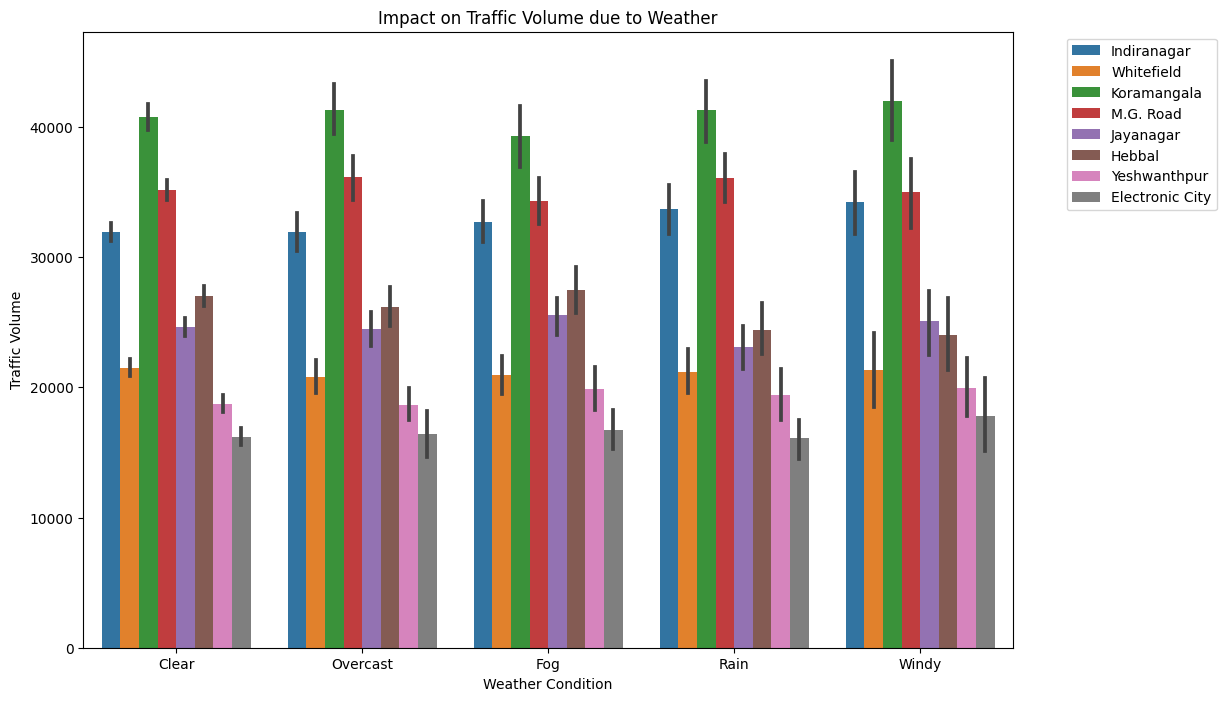

In [19]:
# Checking the impact of Weather Condition on Traffic Volume
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = "Weather Conditions", y = "Traffic Volume", hue = "Area Name")
plt.title("Impact on Traffic Volume due to Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Traffic Volume")
plt.legend(bbox_to_anchor = (1.05, 1))

In [20]:
# checking for the impact of Public Transport Usage on Traffic
# Creating the bins for public transport usage

bins = [0, 25, 50, 75, 100]
labels = ["Low Use", "Medium Low Use", "Medium High Use", "High Use"]

df["Public Transport Bins"] = pd.cut(df["Public Transport Usage"], bins = bins, labels = labels, right = False)

print(df["Public Transport Bins"].value_counts())

Public Transport Bins
Medium High Use    3223
Medium Low Use     3171
Low Use            1903
High Use            639
Name: count, dtype: int64


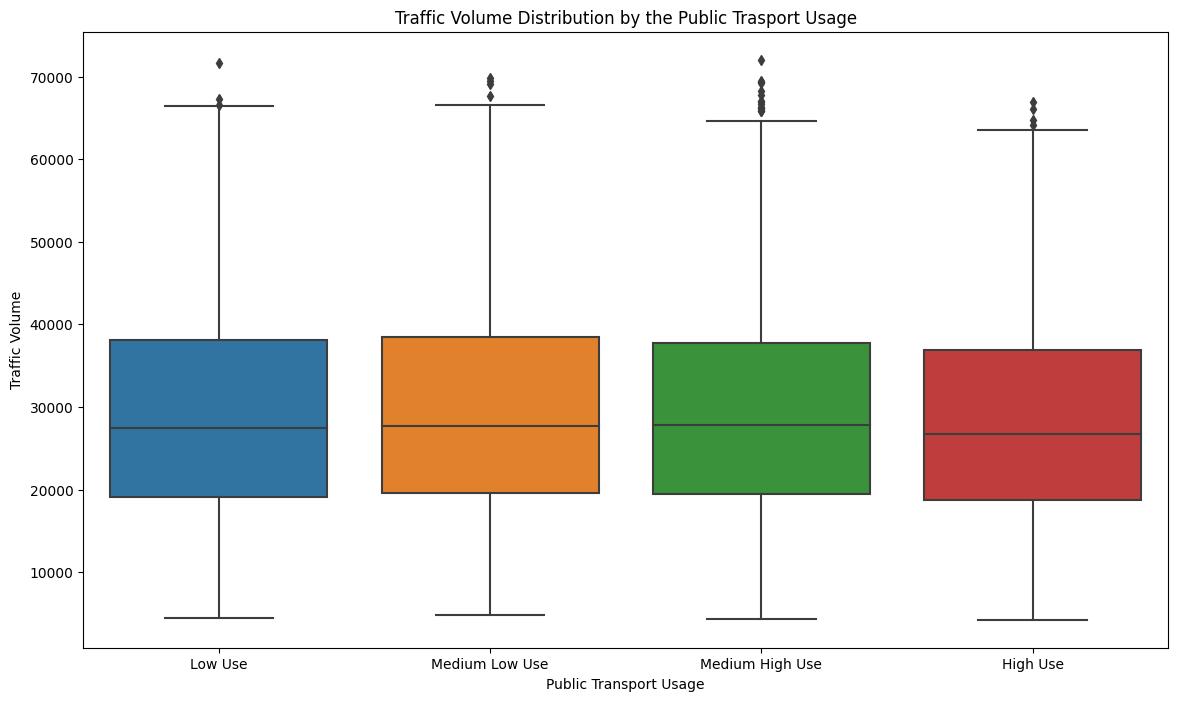

In [21]:
# with bins plotting the relationship between Public Transport Usage and Traffic Volume
plt.figure(figsize = (14, 8))
sns.boxplot(data = df, x = 'Public Transport Bins', y = 'Traffic Volume', order = labels)
plt.title("Traffic Volume Distribution by the Public Trasport Usage")
plt.xlabel("Public Transport Usage")
plt.ylabel("Traffic Volume")
plt.show()

# *Analysis*:

* The median traffic volume is almost identical across all 4 categories
* Very slight decrease in traffic volume as public transport usage increases
* Data shows that there is no clear correlation between public transport usage and the volume of traffic on the roads

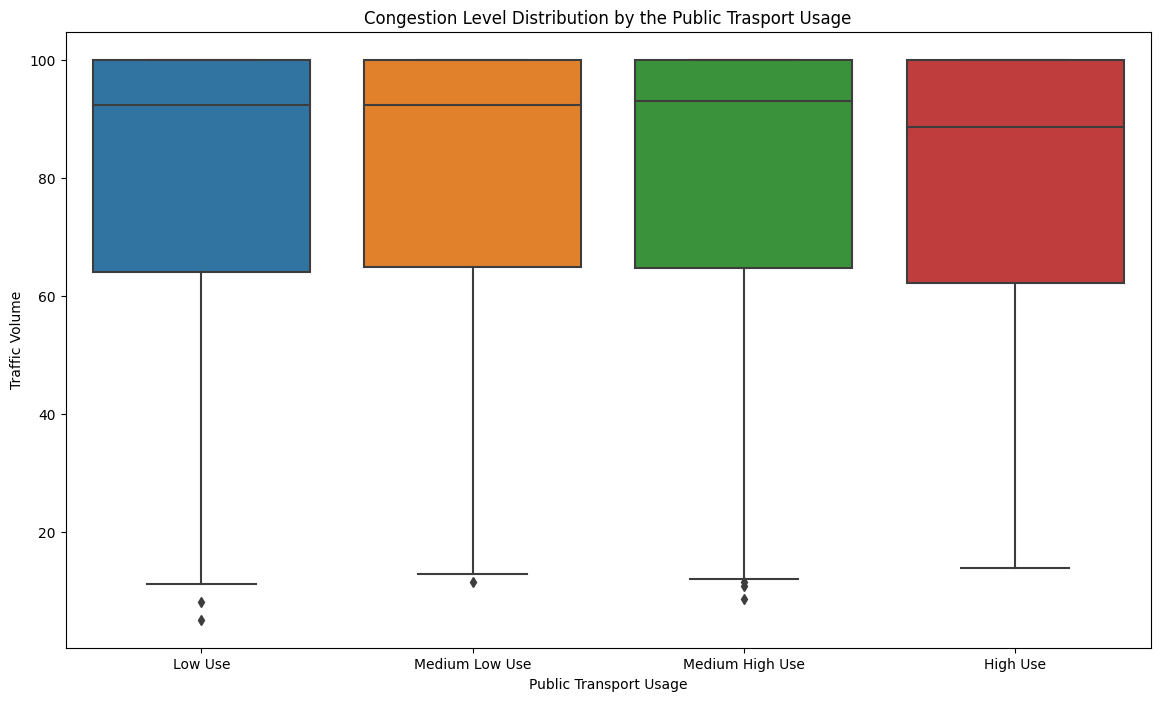

In [22]:
# with bins plotting the relationship between Public Transport Usage and Congestion Level
plt.figure(figsize = (14, 8))
sns.boxplot(data = df, x = 'Public Transport Bins', y = 'Congestion Level', order = labels)
plt.title("Congestion Level Distribution by the Public Trasport Usage")
plt.xlabel("Public Transport Usage")
plt.ylabel("Traffic Volume")
plt.show()

# *Analysis:* 

* All four boxes are at a very high level with the median value for each group appearing to be over 90
* Data visually confirms that public transport usage has no significant impact on the level of congestion